## 코사인(cos)을 활용하여 시계열 테스트 데이터 만들기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                           np.cos(2 * np.pi * month_time),
                           np.cos(2 * np.pi * month_time) + np.random.random(361)
                           )

In [2]:
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i : (i+n)]
        if (i+n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i+n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

In [3]:
n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train: ', patial_x_train.shape, patial_y_train.shape)
print('test: ', x_test.shape, y_test.shape)

train:  (330, 10, 1) (330, 1)
test:  (21, 10, 1) (21, 1)


## 모델 구성하기

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()

# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있다.
# Flatten 층을 사용하기 위해 input_length를 전달해야 한다.

model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))

# LSTM을 혼합하여 모델을 구성
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 32)             128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 11,585
Trainable params: 11,585
Non-trainable params: 0
_________________________________________________________________


## 학습 진행

In [5]:
hist = model.fit(x_train, y_train, epochs = 200, batch_size = 32)
pred = model.predict(x_test)

Epoch 1/200
11/11 [==============================] - 0s 5ms/step - loss: 242.4880 - mse: 242.4880
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 221.7205 - mse: 221.7205
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 201.5742 - mse: 201.5742
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 180.4791 - mse: 180.4791
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 159.0231 - mse: 159.0231
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 141.5487 - mse: 141.5487
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 130.1630 - mse: 130.1630
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 121.0433 - mse: 121.0433
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 113.9450 - mse: 113.9450
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 108.0521 - mse: 108.0521
Epoch 11/200
11/11 

## 결과값 그리기

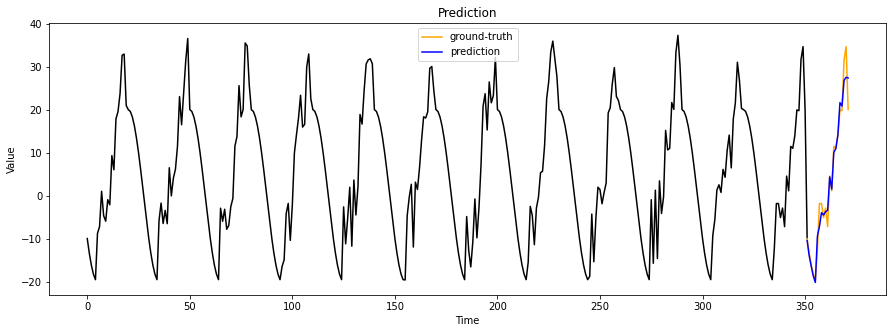

In [6]:
train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 5))
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color = 'orange', label = 'ground-truth')
plt.plot(pred_range, pred, color = 'blue', label = 'prediction')
plt.legend()

plt.show()